# Assignment 7: Linear Model Selection and Regularization

Dataset(s) needed:
Kaggle House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Learning Objectives
- Produce a model with l2 regularization, with a statistically significant improvement over a model without regularization.
- Produce a model with l1 regularization, with a statistically significant improvement over a model without regularization.
- Produce a model with both l1 and l2 regularization terms, with a statistically significant improvement over a model without regularization.
- Produce a logistic regression model with a statistically significant improvement over the null model (a model without input - variables).
- Produce a generalized additive model with a statistically significant improvement over the null model (a model without input variables).

In [196]:
from typing import Union
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

data = pd.read_csv("House Prices.csv")
data.head()


def report_estimator(
    estimator: Union[LinearRegression, Lasso], X_train, y_train, X_test, y_test
):
    print("Model intercept: %.4f" % estimator.intercept_)
    for feature, coef in zip(X_train.columns, estimator.coef_):
        print("%s\t%.4f" % (feature, coef))

    y_train_pred = estimator.predict(X_train)
    print("RMSE (train): %.4f" % root_mean_squared_error(y_train, y_train_pred))

    y_pred = estimator.predict(X_test)
    print("RMSE (test): %.4f" % root_mean_squared_error(y_test, y_pred))

    print("R^2 (train): %.4f" % estimator.score(X_train, y_train))
    print("R^2 (test): %.4f" % estimator.score(X_test, y_test))

 Question 1.1: Drop the Id column as it is not needed for prediction

In [197]:
if 'Id' in data:
  del data['Id']
display(data.head())

display(data.describe())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


 Question 1.2: Visualize a scatter plot of 'GrLivArea' in the x-axis and 'SalePrice' in the y-axis. Can you spot any outliers?

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

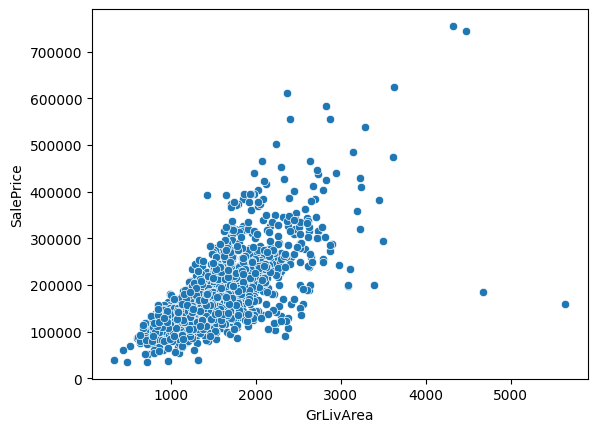

In [198]:
import matplotlib.pyplot as plt
display(sns.scatterplot(x='GrLivArea', y='SalePrice', data=data))

 Question 1.3: Removing outliers in the data for all GrLivArea greater than 4000 then check the scatter plot again

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

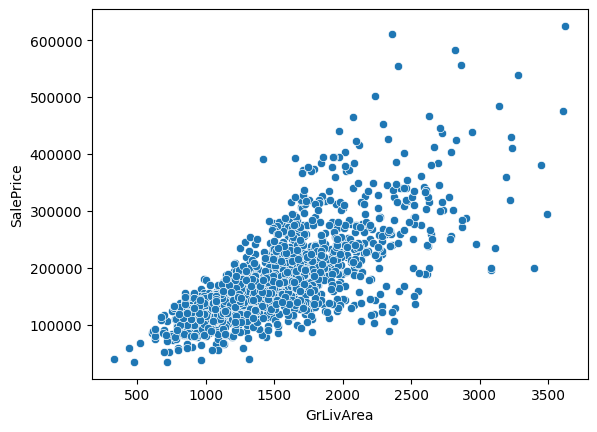

In [199]:
# Remove outliers for data['GrLivArea']>4000
data = data[data["GrLivArea"] <= 4000]
sns.scatterplot(x="GrLivArea", y="SalePrice", data=data)

Quesiont 2.1: Convert categorical variable into dummy variables using pandas get_dummies API


In [200]:
data = pd.get_dummies(data)
print("\n".join(data.columns))

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Grvl
Street_Pave
Alley_Grvl
Alley_Pave
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_Bnk
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_AllPub
Utilities_NoSeWa
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Gtl
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighbo

Question 2.2: Impute missing data by the median of each column.

In [201]:
data = data.fillna(data.median())

Question 2.2b: Make sure that there are no null values remaining

In [202]:
print(f"All of the obesrvations are not null? {data.notna().all().all()}")

data.head()

All of the obesrvations are not null? True


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,True,False,False,False,False,True,False


Question 2.3: Generate train test split 70/30. Set random_state=42

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1), data["SalePrice"], test_size=0.3, random_state=42
)

print(f"Number of observations in train:\t{len(X_train)}")
print(f"Number of observations in test:\t\t{len(X_test)}")

print(f"Number of features:\t{len(X_train.columns)}")

scaler = StandardScaler()
scaler.set_output(transform="pandas")
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Number of observations in train:	2039
Number of observations in test:		875
Number of features:	286


Question 3.1: Train a linear regression algorithm to predict `SalePrice` from the remaining features.

In [204]:
from sklearn.linear_model import (
    Ridge,
    RidgeCV,
    ElasticNet,
    LassoCV,
    LassoLarsCV,
    LinearRegression,
    ElasticNetCV,
)
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Fit a linear regression model to this data
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

Question 3.2: Evaluate the model and report the performance on both training and test data. These numbers will serve as our benchmark performance.

In [205]:
report_estimator(linear_regression, X_train, y_train, X_test, y_test)

Model intercept: 171021.2292
MSSubClass	-3061.4681
LotFrontage	-1616.4613
LotArea	5248.3206
OverallQual	6024.6014
OverallCond	4540.2820
YearBuilt	7768.1941
YearRemodAdd	-244.1112
MasVnrArea	2641.3425
BsmtFinSF1	117301417938203280.0000
BsmtFinSF2	44873139093522104.0000
BsmtUnfSF	119042499777745872.0000
TotalBsmtSF	-113226749545296336.0000
1stFlrSF	-308550750971656960.0000
2ndFlrSF	-346051473445796160.0000
LowQualFinSF	-35506515066071572.0000
GrLivArea	397063685904659968.0000
BsmtFullBath	558.6049
BsmtHalfBath	764.7332
FullBath	2302.6294
HalfBath	749.0599
BedroomAbvGr	-6566.3990
KitchenAbvGr	-6759.4175
TotRmsAbvGrd	10326.4956
Fireplaces	226.3100
GarageYrBlt	-2671.2569
GarageCars	-711.5674
GarageArea	1556.3651
WoodDeckSF	1238.4626
OpenPorchSF	358.7919
EnclosedPorch	845.4192
3SsnPorch	1734.3005
ScreenPorch	-94.7631
PoolArea	228.1690
MiscVal	-1412.0000
MoSold	2220.0000
YrSold	198.2500
MSZoning_C (all)	-6040.0000
MSZoning_FV	-9920.0000
MSZoning_RH	-6480.0000
MSZoning_RL	-25362.0000
MSZoning_

We now train a regularized version of `LinearRegression` called `Lasso` (you can load it from the same library). `Lasso` has an argument called `alpha`, which is the **shrinkage parameter** we referred to earlier.

Question 4.1: Let `alpha = 0.000001` and train a `Lasso` algorithm. Show that the resulting model is practically identical to the one we trained with `LinearRegression`. There are different ways to show this, so you will need to think of a way. <span style="color:red" float:right>[2 point]</span>

In [206]:
from sklearn import linear_model

alpha = 10**-6  # the same as 0.000001

# Apparently max_iter is too low to reach cvonvergence.
lasso_regression = linear_model.Lasso(alpha=alpha, max_iter=10**4)
lasso_regression.fit(X_train, y_train)

# Compute the RMSE, we can also look at how well the model fits the training data
report_estimator(lasso_regression, X_train, y_train, X_test, y_test)

# To see whether the models are similar, we can first see how effective they are.
print(
    "R^2 (test) in linear regression: %.4f" % linear_regression.score(X_train, y_train)
)
print("R^2 (test) in Lass regression: %.4f" % lasso_regression.score(X_train, y_train))

# They're the same!

# Another way could be looking at RMSE of the coefficients!
for feature, linear, lasso in zip(X_train.columns, linear_regression.coef_, lasso_regression.coef_):
    print("%s\t%.4f\t%.4f" % (feature, linear, lasso))
print(
    "RMSE of the coefficients between regressions: %.4f"
    % root_mean_squared_error(linear_regression.coef_, lasso_regression.coef_)
)

/Users/matehal/Documents/mhaligowski/uw/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.422e+12, tolerance: 6.298e+08
  model = cd_fast.enet_coordinate_descent(


Model intercept: 170991.1927
MSSubClass	-3038.9058
LotFrontage	-1445.0976
LotArea	4855.1320
OverallQual	5474.5586
OverallCond	4522.4677
YearBuilt	9067.3152
YearRemodAdd	-199.9791
MasVnrArea	2292.6038
BsmtFinSF1	8495.2777
BsmtFinSF2	-449.8526
BsmtUnfSF	6301.2895
TotalBsmtSF	3854.8325
1stFlrSF	3254.4268
2ndFlrSF	10233.7720
LowQualFinSF	-444.1353
GrLivArea	2235.9180
BsmtFullBath	27.7437
BsmtHalfBath	451.6528
FullBath	2301.4153
HalfBath	944.0637
BedroomAbvGr	-7199.0713
KitchenAbvGr	-6216.0998
TotRmsAbvGrd	10616.9568
Fireplaces	-487.7455
GarageYrBlt	-3023.0830
GarageCars	-724.4885
GarageArea	1962.1784
WoodDeckSF	1152.2131
OpenPorchSF	577.4460
EnclosedPorch	961.4534
3SsnPorch	1873.3028
ScreenPorch	265.6705
PoolArea	84.9968
MiscVal	-1102.1642
MoSold	1757.0044
YrSold	-77.0296
MSZoning_C (all)	-6811.3688
MSZoning_FV	-11007.1143
MSZoning_RH	-7154.6573
MSZoning_RL	-27745.0805
MSZoning_RM	-27129.9447
Street_Grvl	-1111.6681
Street_Pave	0.0000
Alley_Grvl	-427.4411
Alley_Pave	-812.8227
LotShape_IR1	-

Question 4.2: Iteratively train a new `Lasso` model, letting `alpha` change each time to one of the values given by `alpha_vals` below, keeping track of the performance on the training and test data each time, and storing the model's coefficients each time (the `coef_` attribute of the trained model)

In [207]:
alpha_vals = np.arange(0.01, 5, 0.01)  # values of alpha we want to iterate over
coefficient_names = X_test.columns.tolist()  # let's get the names of the coefficients

linreg_result = pd.DataFrame(
    columns=["intercept"]
    + coefficient_names
    + ["RMSE_train", "R^2_train", "RMSE_test", "R^2_test"]
)

linreg_result.loc[0] = (
    [linear_regression.intercept_]
    + linear_regression.coef_.tolist()
    + [
        root_mean_squared_error(y_train, linear_regression.predict(X_train)),
        r2_score(y_train, linear_regression.predict(X_train)),
    ]
    + [
        root_mean_squared_error(y_test, linear_regression.predict(X_test)),
        r2_score(y_test, linear_regression.predict(X_test)),
    ]
)

lasso_results = pd.DataFrame(columns=["alpha"] + linreg_result.columns.tolist())

for index, alpha in enumerate(alpha_vals):
    lasso_regression = linear_model.Lasso(alpha=alpha)
    lasso_regression.fit(X_train, y_train)
    lasso_pred = lasso_regression.predict(X_test)

    lasso_results.loc[index] = (
        [alpha]
        + [lasso_regression.intercept_]
        + lasso_regression.coef_.tolist()
        + [
            root_mean_squared_error(y_train, lasso_regression.predict(X_train)),
            r2_score(y_train, lasso_regression.predict(X_train)),
        ]
        + [root_mean_squared_error(y_test, lasso_pred), r2_score(y_test, lasso_pred)]
    )

/Users/matehal/Documents/mhaligowski/uw/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.495e+12, tolerance: 6.298e+08
  model = cd_fast.enet_coordinate_descent(
/Users/matehal/Documents/mhaligowski/uw/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.488e+12, tolerance: 6.298e+08
  model = cd_fast.enet_coordinate_descent(
/Users/matehal/Documents/mhaligowski/uw/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

Question 4.3: Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`.

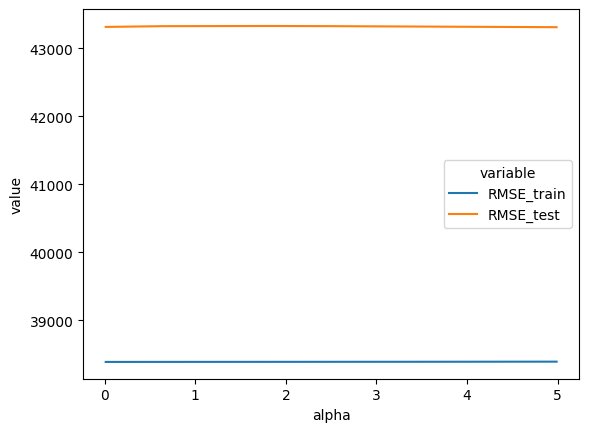

In [208]:
def rmse_plot(df):
    rmse = sns.lineplot(
        x="alpha",
        y="value",
        data=pd.melt(
            df, ["alpha"], ["RMSE_train", "RMSE_test"]
        ),
        legend="full",
        hue="variable",
    )

rmse_plot(lasso_results)


In [209]:
def rsq_plot(df):
    sns.lineplot(
        x="alpha",
        y="value",
        data=pd.melt(
            df, ["alpha"], ["R^2_train", "R^2_test"]
        ),
        hue="variable",
    )

Question 4.4: Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`. HINT: They should appear to be shrinking toward zero as you increase `alpha`!

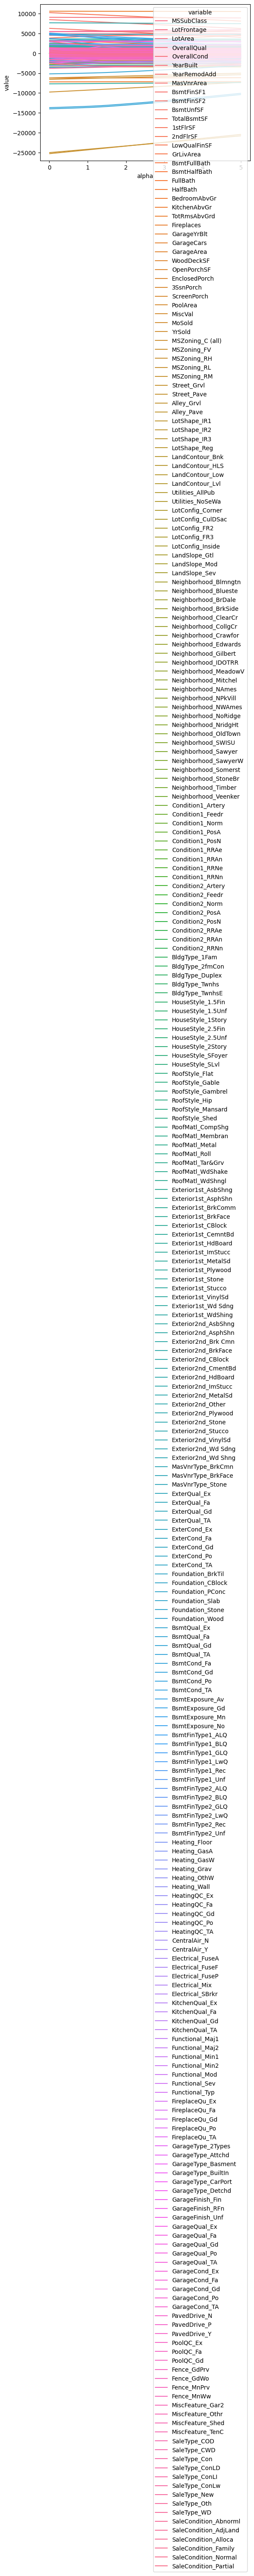

In [210]:
def coefficients_plot(df):
    sns.lineplot(
        x="alpha",
        y="value",
        data=pd.melt(df, ["alpha"], coefficient_names),
        hue="variable",
    )

coefficients_plot(lasso_results)

Question 5.1: Repeat steps in Question 4 this time using `Ridge` instead of `Lasso`. We will use the following range for `alpha`: <span style="color:red" float:right>[2 point]

In [211]:
alpha_vals = np.arange(0.1, 200, 1)
linreg_result = pd.DataFrame(
    columns=["intercept"]
    + coefficient_names
    + ["RMSE_train", "R^2_train", "RMSE_test", "R^2_test"]
)

linreg_result.loc[0] = (
    [linear_regression.intercept_]
    + linear_regression.coef_.tolist()
    + [
        root_mean_squared_error(y_train, linear_regression.predict(X_train)),
        r2_score(y_train, linear_regression.predict(X_train)),
    ]
    + [
        root_mean_squared_error(y_test, linear_regression.predict(X_test)),
        r2_score(y_test, linear_regression.predict(X_test)),
    ]
)

ridge_results = pd.DataFrame(columns=["alpha"] + linreg_result.columns.tolist())

for index, alpha in enumerate(alpha_vals):
    ridge_regression = linear_model.Ridge(alpha=alpha)
    ridge_regression.fit(X_train, y_train)
    ridge_pred = ridge_regression.predict(X_test)

    ridge_results.loc[index] = (
        [alpha]
        + [ridge_regression.intercept_]
        + ridge_regression.coef_.tolist()
        + [
            root_mean_squared_error(y_train, ridge_regression.predict(X_train)),
            r2_score(y_train, ridge_regression.predict(X_train)),
        ]
        + [root_mean_squared_error(y_test, ridge_pred), r2_score(y_test, ridge_pred)]
    )

Question 5.2: Using a visual, show how the performance on the training and test data changed as we gradually increased `alpha`.

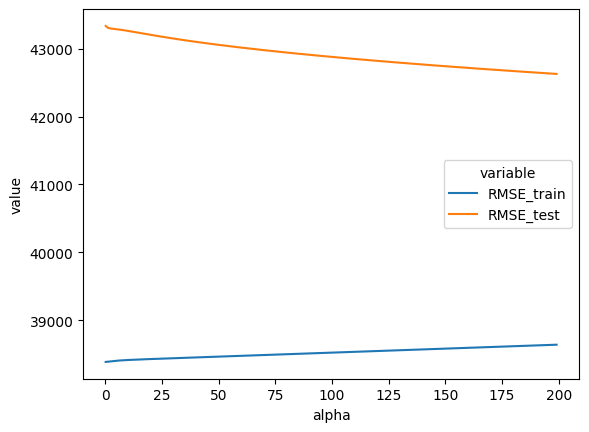

In [212]:
rmse_plot(ridge_results)

Question 5.3: Using a visual, show how the model's coefficients changed as we gradually increased the shrinkage parameter `alpha`.

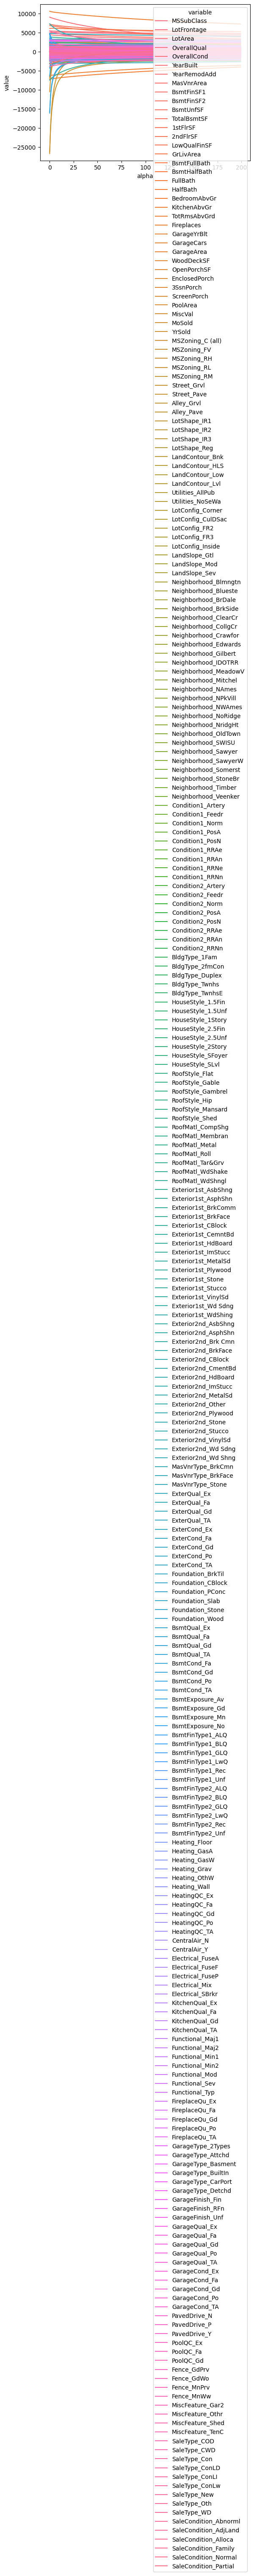

In [213]:
coefficients_plot(ridge_results)

Question 6: Repeat questions 5.1 - 5.3 using elasticnet experimenting with differnet values of alpha

In [214]:
alpha_vals = np.arange(0.1, 200, 1)
linreg_result = pd.DataFrame(
    columns=["intercept"]
    + coefficient_names
    + ["RMSE_train", "R^2_train", "RMSE_test", "R^2_test"]
)

linreg_result.loc[0] = (
    [linear_regression.intercept_]
    + linear_regression.coef_.tolist()
    + [
        root_mean_squared_error(y_train, linear_regression.predict(X_train)),
        r2_score(y_train, linear_regression.predict(X_train)),
    ]
    + [
        root_mean_squared_error(y_test, linear_regression.predict(X_test)),
        r2_score(y_test, linear_regression.predict(X_test)),
    ]
)

elastic_results = pd.DataFrame(columns=["alpha"] + linreg_result.columns.tolist())

for index, alpha in enumerate(alpha_vals):
    elastic_regression = linear_model.ElasticNet(alpha=alpha)
    elastic_regression.fit(X_train, y_train)
    elastic_pred = elastic_regression.predict(X_test)

    ridge_results.loc[index] = (
        [alpha]
        + [ridge_regression.intercept_]
        + ridge_regression.coef_.tolist()
        + [
            root_mean_squared_error(y_train, elastic_regression.predict(X_train)),
            r2_score(y_train, elastic_regression.predict(X_train)),
        ]
        + [root_mean_squared_error(y_test, elastic_pred), r2_score(y_test, elastic_pred)]
    )

Question 7: Based on the results, briefly describe the effect of changing `alpha` on the coefficients of both `Ridge`, `Lasso`, anf `ElasticNet`. What value of `alpha` would you choose for each case? You do not need to give a precise answer, but choose a number.

In [ ]:
Not sure if I made the right choice of the model, but it seems like the larger the alpha value, the better the model. I would maximize the alpha value to get the best model.

Question 8: Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include:

What was your incoming experience with this model, if any? what steps you took, what obstacles you encountered. how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?) This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work

When I was coming to the exercise, it felt like it was going to be a relatively easy one. Turned out to be more complex as I expected. I didn't do much of the validation of the coefficients, I think I could go back and forth with looking at which coefficients are statistically significant and gradually remove them.

I should probably do a better job evaluating the models, feels like AIC and BIC could be the way to go.